In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(-np.pi*12, np.pi*12,0.01)
noise = np.random.normal(0, .01, len(x))
y1 = np.sin(x)
y2 = np.sin(1.1*x)

## Imagine the result of lagged cross-correlation gives the curves below

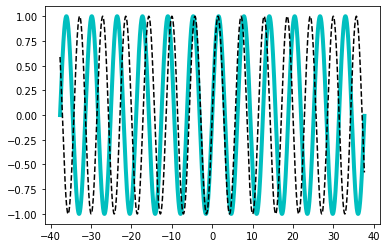

In [11]:
fig, ax = plt.subplots(1,1)
ax.plot(x, y1, c='c', linewidth=4)
ax.plot(x, y2, c='k', linestyle='dashed')
plt.show()

## Get uncertainty using peak-to-peak and trough-to-trough offset

In [4]:
# 1) Find  all local minima an maxima in y1 and y2
# First find all zeros
y_indices = np.arange(0,len(y1))
zeros1 = np.zeros(np.shape(y1), dtype=bool)
zeros2 = np.zeros(np.shape(y2), dtype=bool)
for index in np.arange(0, len(y1)-1):
    if np.sign(y1[index]) != np.sign(y1[index+1]):
        zeros1[index] = True
        
    if np.sign(y2[index]) != np.sign(y2[index+1]):
        zeros2[index] = True

# calculate offset between local minima and maxima
zeros1Indices = y_indices[zeros1]
offsetsMax = np.zeros(np.sum(zeros1),)
offsetsMin = np.zeros(np.sum(zeros1),)
x_y1Max = np.zeros(np.sum(zeros1),)
x_y1Min = np.zeros(np.sum(zeros1),)
x_y2Max = np.zeros(np.sum(zeros1),)
x_y2Min = np.zeros(np.sum(zeros1),) 

for index in np.arange(0, np.sum(zeros1)-1):
    startInd = zeros1Indices[index]
    endInd = zeros1Indices[index+1]
    x_y1Max[index] = x[y1 == np.max(y1[startInd:endInd])] #find x-position of y1 max
    x_y1Min[index] = x[y1 == np.min(y1[startInd:endInd])] #"" y1 min
    
    x_y2Max[index] = x[y2 == np.max(y2[startInd:endInd])] #find x-position of y2 max
    x_y2Min[index] = x[y2 == np.min(y2[startInd:endInd])] # "" y2 min
    
offsetsMax = x_y1Max - x_y2Max
offsetsMin = x_y1Min - x_y2Min
offsets = np.asarray([offsetsMax,offsetsMin])
    # What happens if there are not the same number of mins and maxs between y1 and y2?
    # Perhaps it is better to create a pdf or cdf of the slopes?
# calculate standard deviation and RMSE from those offsets
#for ii in np.arange(0, len(y1)-1):
    

In [9]:
RMSE = np.sqrt( np.sum(offsets**2) / len(offsets) )
print("Root mean square error = {:.2f}".format(RMSE))

Root mean square error = 7.80


## Next we need to propagate this through to the velocity

### Other sources of uncertainty to consider:
Signal-to-noise ratio (how much does ATL06 look like ATL03?)
Resolution threshold: X-correlation precision is limited by resolution of ATL06 (or product of our own reprocessing)